<a href="https://colab.research.google.com/github/phyop/220505_TensorFlow2/blob/main/220321_%E6%95%B0%E6%8D%AE%E5%A2%9E%E5%BC%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Augmentation

<!-- ![caption](notebook_img/1.png) -->
![](https://drive.google.com/uc?export=view&id=1T1H5zu0u9GuUC7535cd6pFtn-hM9dK1G)

#### 深度学习中最依赖的就是数据量了，同样一只猫轻松一变数据量就翻倍了

In [ ]:
# PIL.Image模組的功能，常用就是open去開圖片檔
# keras.preprocessing.image 裡面有各種圖像預處理方法，比如圖像增強
# Keras基本夠用了，但如果要更細節，可以去OpenCV中找
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
from keras.preprocessing import image
import keras.backend as K 
import os
import glob
import numpy as np

In [ ]:
# # PEP 8 建議的 import 語句順序

# 1. Python 內建的 modules
# 2. 第三方 modules
# 3. 本地 modules

# # 精神就是，Coding是從上往下一行行執行，後面寫入的會覆蓋前面的結果。
# 官方內建的一定最基礎。
# 而第三方（非使用者也非提供者）一定是去補足官方的不足，所以會覆蓋官方。
# 自己個人需求一定至上，所以自己本地寫的放最後，去覆蓋所有上面的import。

In [ ]:
# # glob --- Unix 风格路径名模式扩展
# https://docs.python.org/zh-tw/3/library/glob.html

# # 通过使用 os.scandir() 和 fnmatch.fnmatch() 函数来实现的，会按不确定的顺序返回结果。
# # 不同于 fnmatch.fnmatch()，glob 会将以点号 (.) 开头的文件名作为特殊情况来处理。 
# # 波浪号扩展不会生效，对于波浪号和终端变量扩展，请使用 os.path.expanduser() 和 os.path.expandvars()。
# # 对于字面值匹配，请将原字符用方括号括起来。 例如，'[?]' 将匹配字符 '?'。


# # 透過 glob.glob 結合正規表達式，就可以輕鬆的指定一些篩選條件，抓出想要的檔案路徑。
# https://ithelp.ithome.com.tw/articles/10262521

# # 在Folder_1下，建立資料夾Folder_11
# >>> os.mkdir(os.path.join("Folder_1", "Folder_11"))
# >>> os.mkdir(os.path.join("Folder_1", "Folder_12"))

# # [1-2] 就是匹配 1 到 2 之間的整數數值
# # 取得 Folder_1 這層裡面，檔名中有 1 或 2 的東西的路徑
# >>> print(glob.glob(os.path.join("Folder_1", "*[1-2]*")))
# ['Folder_1/Folder_11', 'Folder_1/Folder_12']

### 展示输入数据

In [ ]:
# glob.glob(正則path) 會返回在正則路徑下找到的dir、file，以list的形式
# glob.glob（'./img/superman/*'）

# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html
# plt.figure 會創建畫布，但如果已經存在，則會激活已存在的並返回。
# figsize=(寬, 高)), 默認 [6.4, 4.8]，單位英寸。
# fig.add_subplot(131+i) 對畫布增加子圖進去，1row，3column，第1張子圖位置

def print_result(path):  # 創建畫布去顯示，路徑下找到的前3張圖片
    name_list = glob.glob(path) # 從路徑下找到圖片，返回圖片列表。
    fig = plt.figure(figsize=(12,16)) # 創建(12,16)英吋的畫布，名為fig
    for i in range(3): # 對前3張圖像操作就好
        img = Image.open(name_list[i]) # 用PIL（專門處理2進位資料，比如影音），從找到的路徑列表中一個個打開圖像
        sub_img = fig.add_subplot(131+i) # 在畫布fig中，指定子圖位置，一張張加入
        sub_img.imshow(img) # 每加入一張子圖，就顯示一張

In [ ]:
cd /content/drive/MyDrive/GoogleDrive_yaboaru/Colab Notebooks/220304_唐tensorflow2版本实战/第六章：图像数据增强实例/

/content/drive/MyDrive/GoogleDrive_yaboaru/Colab Notebooks/220304_唐tensorflow2版本实战/第六章：图像数据增强实例


In [ ]:
pwd

'/content/drive/MyDrive/GoogleDrive_yaboaru/Colab Notebooks/220304_唐tensorflow2版本实战/第六章：图像数据增强实例'

In [ ]:
# 把路徑相關變數都聚一起，比較清楚
current_path = "/content/drive/MyDrive/GoogleDrive_yaboaru/Colab Notebooks/220304_唐tensorflow2版本实战/第六章：图像数据增强实例"
img_path = os.path.join(current_path, 'img/Superman/*') # 要餵給glob.glob（路徑正則）
in_path = os.path.join(current_path, 'img/')
out_path = os.path.join(current_path, 'output/')
name_list = glob.glob(img_path)
name_list

['/content/drive/MyDrive/GoogleDrive_yaboaru/Colab Notebooks/220304_唐tensorflow2版本实战/第六章：图像数据增强实例/img/Superman/00000008.jpg',
 '/content/drive/MyDrive/GoogleDrive_yaboaru/Colab Notebooks/220304_唐tensorflow2版本实战/第六章：图像数据增强实例/img/Superman/00000009.jpg',
 '/content/drive/MyDrive/GoogleDrive_yaboaru/Colab Notebooks/220304_唐tensorflow2版本实战/第六章：图像数据增强实例/img/Superman/00000010.jpg']

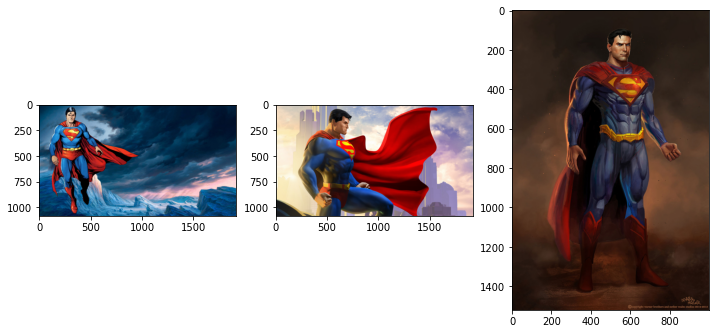

In [ ]:
print_result(img_path) # 執行自定義函數（創建畫布去顯示，路徑下找到的前3張圖片）

### 指定target_size后所有图像都变为相同大小

In [ ]:
# 在Keras裡面，會按照path中的文件夾個數，去當做標籤的分類數
# 現在只是先做預處理，不是訓練，所以shuffle=False
# 訓練的圖像必須同size， target_size=(224, 224)
# 不然卷積核對圖像做步進的時候，圖像有大有小，特征圖也變得忽大忽小，那疊加起來的特征圖就有問題啦
# 想要用OpenCV去做也可以，不過既然tf.keras可以用，就沒必要一定要去import其他工具
# path是字串，所以可以直接相加。命名輸出的資料夾 save_to_dir=xxx_path+'resize'
# 產出的增強圖像，為了避免名稱混淆，加一下save_prefix='gen'參數
# ImageDataGenerator()裡面的參數是空的，因為我們還沒開始去做數據增強，只是做resize而已
# 建好一個ImageDataGenerator()後，就可以用flow_from_directory，對dir裡的圖片一一去做轉換了
datagen = image.ImageDataGenerator()
gen_data = datagen.flow_from_directory(in_path, batch_size=1, shuffle=False, 
                                       save_to_dir=out_path+'resize', 
                                  save_prefix='gen', target_size=(224, 224))

# Found 3 images belonging to 1 classes.
# 因為path中， 有一個superman資料夾（一個分類），而裡面有3張圖片

Found 3 images belonging to 1 classes.


In [ ]:
# flow_from_directory是DirectoryIterator類的方法，也就是會去對dir內的dir、file，一一迭代執行
# DirectoryIterator會回傳numpy 數組(x, y) -> (圖像，標籤)
# 但必須要用迭代的方式去呼叫next()，才會一個個對path裡的圖像，實際產出增強後的圖片
for i in range(3):
    gen_data.next()

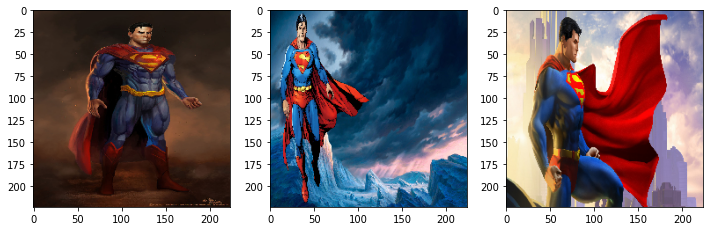

In [ ]:
# 對經過ImageDataGenerator().flow_from_directory，做過resize後的圖片資料夾
# 創建畫布去顯示，路徑下找到的前3張圖片
print_result(out_path+'resize/*') 

### 角度旋转

In [ ]:
# 《ImageDataGenerator、concatenate、fit、flow_from_directory、next》
# https://zhuanlan.zhihu.com/p/51104570

# 要做數據增強的話，角度通常30度以內就很夠了，45度是方便示範顯示用而已
# save_to_dir，來指定放入產生圖像的資料夾（要先自己創建那個資料夾！）
# 之前resize沒有
gen = image.ImageDataGenerator() # 做出一個圖片增強的產生器，但不設置如翻轉、位移等參數
# 為產生器增加dir的環境參數，dir下的圖片要做shuffle,並且1個batch就要做完dir下的所有圖片
data = gen.flow_from_directory(in_path, batch_size=1, class_mode=None, shuffle=True, target_size=(224, 224))
# print(type(data)) # <class 'keras.preprocessing.image.DirectoryIterator'>
# data是flow_from_directory回傳的tuples元組們(圖像, 標籤)
# dir下有幾張圖，就有幾個元組。
# 圖像是數組，也就是np.ndarray，形狀是(batch_size, *target_size, channels)
# 做出產生器後，要next去迭代，才會開始把tuples形式的(圖像, 標籤)數據們，一個個產出
# 因為圖像是np.ndarray的格式，所以可以用np.concatenate，把圖像們以np數據的形式結合在一起
np_data = np.concatenate([data.next() for i in range(data.n)]) 
# data.n -> 產生器中有幾張圖片
# print(data.n) # 3

# 做一個有45度旋轉的datagen，來和原始圖像產生器data做對比
datagen = image.ImageDataGenerator(rotation_range=45)
# 要先對圖像來源執行各種統計計算(均值、方差...)，才能對圖像做一些操作轉換
# 比如使用featurewise_center，featurewise_std_normalization或zca_whitening的時候
datagen.fit(np_data) 
# 為產生器增加dir的環境參數,指定輸入、輸出資料夾、輸出圖像名稱前綴、輸出圖像像素大小
gen_data = datagen.flow_from_directory(in_path, batch_size=1, shuffle=False, save_to_dir=out_path+'rotation_range',save_prefix='gen', target_size=(224, 224))
for i in range(3):
    gen_data.next() # 打印結果，也就是產生新圖像於資料夾中

Found 3 images belonging to 1 classes.
<class 'keras.preprocessing.image.DirectoryIterator'>
Found 3 images belonging to 1 classes.


In [ ]:
# # ImageDataGenerator 的 rescale 與 flow_from_directory的 target_size

# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

# tf.keras.preprocessing.image.ImageDataGenerator(
#     featurewise_center=False, samplewise_center=False,
#     featurewise_std_normalization=False, samplewise_std_normalization=False,
#     zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0,
#     height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0,
#     channel_shift_range=0.0, fill_mode='nearest', cval=0.0,
#     horizontal_flip=False, vertical_flip=False, rescale=None,
#     preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None
# )
# # rescale，重新縮放因子。默認為無。如果 None 或 0，則不應用重新縮放，否則我們將數據乘以提供的值（在應用所有其他轉換之後）
# # ImageDataGenerator比較有各種圖像增強的操作，比如亮度、偏移、翻轉之類的

# ####################

# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory

# flow_from_directory(
#     directory, target_size=(256, 256), color_mode='rgb', classes=None,
#     class_mode='categorical', batch_size=32, shuffle=True, seed=None,
#     save_to_dir=None, save_prefix='', save_format='png',
#     follow_links=False, subset=None, interpolation='nearest'
# )
# # target_size，找到的所有圖像都將調整到指定的尺寸，預設(256,256)
# # flow_from_directory，比較像是在指定好ImageDataGenerator的增強設置後，去做一些比較大的環境設置
# # 比如batch、shuffle、存放dir、輸出圖片format之類的

# """
# ##########################################################

In [ ]:
"""
https://hackmd.io/@allen108108/SyCsOIkxB

# mnist.load_data()會回傳一個tuple -> (訓練集, 驗證集)
# 訓練集、驗證集，也各是一個tuple -> (圖像, lable)
# 圖像是np.ndarray的形式 -> (batchs, rows, columns, channels)
# 比如 圖像[10, :,:,:] 就是第10張圖像，所有區域及RGBA都疊加起來的樣子
# lable也是np.ndarray，比如手寫數字0~9，且不是one-hot -> (batchs,)
# 比如(10000,)，維度可以當做是10000*1，也可以當做是1*10000
# 如果當做10000*1，那label[10] 就是取第10 row的那個值，也就是第10張圖像的標籤，也就是會回傳0~9之間的某一個數值。

>>> (train_data,train_label),(test_data,test_label)=mnist.load_data()
>>> train_data.shape
(60000, 28, 28)
>>> test_data.shape
(10000, 28, 28)

---------------------

# 把圖像生成產生器設置好
>>> train_datagen=ImageDataGenerator(rotation_range=15 , 
                                 width_shift_range=0.2 , 
                                 height_shift_range=0.2 ,
                                 shear_range=0.2 ,
                                 zoom_range=0.2 , 
                                 data_format='channels_last')

# 就可以利用產生器，去對輸入來源做fit，產生圖像
# 圖像要以np.ndarray的形式傳入
>>> train_datagen.fit(train_data)

---------------------

這邊也有許多要注意的地方 :

如果我們在訓練資料上使用任何的 generator，比如ImageDataGenerator，
在訓練的步驟就應該使用fit_generator()。

我們以往對於資料 fit 以後還要再做 transform。
但在 ImageDataGenerator 我們在 fit 完後，要把資料做轉換的步驟則是用 .flow(X,y) 是 .flow_from_directory(directory)。

一個 epoch 要跑完全部的訓練資料，
若訓練資料有 n 筆，batch size 為 m ，那麼每一個 epoch 應該要跑 n/m 次，
亦即 steps_per_epoch(一個epoch要幾步驟才完成)*batch_size(一個步驟有幾個資料)= len(training data)。

---------------------

這邊蠻有趣的地方是，以往訓練資料的準確度應該要比驗證資料來的高， Loss 應該要比驗證資料來的低。
但經過 ImageDataGenerator 後，訓練資料表現卻總是不及驗證資料。
但最後測試資料的分數仍然有明顯的提高。

"""

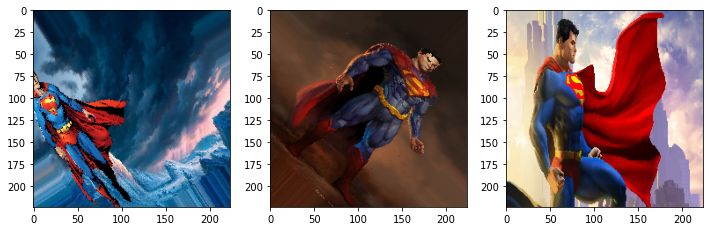

In [ ]:
print_result(out_path+'rotation_range/*')

### 平移变换

In [ ]:
https://keras.io/zh/preprocessing/image/
# shift_range類的： 如果 <1，则是除以总宽度的值，或者如果 >=1，则为像素值。
# 平移後越界的部分，可以選擇填充方式
# fill_mode: {"constant", "nearest", "reflect" or "wrap"} 之一。默认为 'nearest'。
# 邊界就是 | abcd |
# 'constant': kkkkkkkk | abcd | kkkkkkkk (cval=k) -> 固定值填充（自定一個k值，定義於參數cval）
# 'nearest': aaaaaaaa | abcd | dddddddd -> 固定值填充（邊界那個點的值）
# 'reflect': abcddcba | abcd | dcbaabcd -> 超出的部分，是等長鏡像未超出部分的圖像
# 'wrap': abcdabcd | abcd | abcdabcd -> 超出的部分，是等長重複未超出部分的圖像
# cval: 浮点数或整数。用于边界之外的点的值，当 fill_mode = "constant" 时。

gen = image.ImageDataGenerator() # 無修正參數的generator
data = gen.flow_from_directory(in_path, batch_size=1, class_mode=None, shuffle=True, target_size=(224, 224)) # 將無參數generator，套用到dir上，從此就可以從dir一個個取出無修正參數的圖像
# 因爲fit函數要先有原始的圖像數據，所以利用無修正參數的generator，一個個取出原始圖像，concat成一團np.ndarray形式的數據
np_data = np.concatenate([data.next() for i in range(data.n)]) 
datagen = image.ImageDataGenerator(width_shift_range=0.3,height_shift_range=0.3) # 有修正參數的generator
datagen.fit(np_data) # fit將generator的參數，代入到原始圖像數據計算出來的統計資料，做出一個轉換矩陣，形成一個圖像修正的generator
# 利用圖像修正的generator，開始output出修正後的圖片
gen_data = datagen.flow_from_directory(in_path, batch_size=1, shuffle=False, save_to_dir=out_path+'shift',save_prefix='gen', target_size=(224, 224))
for i in range(3):
    gen_data.next()

Found 3 images belonging to 1 classes.
Found 3 images belonging to 1 classes.


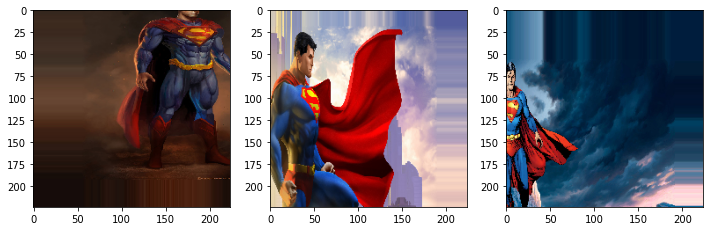

In [ ]:
# 做完上面的code，會在dir中顯示圖片沒錯
# 不過如果想要在command這邊顯示，就要自行定義func
print_result(out_path+'shift/*') 

In [ ]:
# 前面shift是(0.3,0.3)，這邊是(-0.3,0.3)
# 其他地方都和上面一樣，沒什麼值得看的
datagen = image.ImageDataGenerator(width_shift_range=-0.3,height_shift_range=0.3)
gen = image.ImageDataGenerator()
data = gen.flow_from_directory(in_path, batch_size=1, class_mode=None, shuffle=True, target_size=(224, 224))
np_data = np.concatenate([data.next() for i in range(data.n)])
datagen.fit(np_data)
gen_data = datagen.flow_from_directory(in_path, batch_size=1, shuffle=False, save_to_dir=out_path+'shift2',save_prefix='gen', target_size=(224, 224))
for i in range(3):
    gen_data.next()

Found 3 images belonging to 1 classes.
Found 3 images belonging to 1 classes.


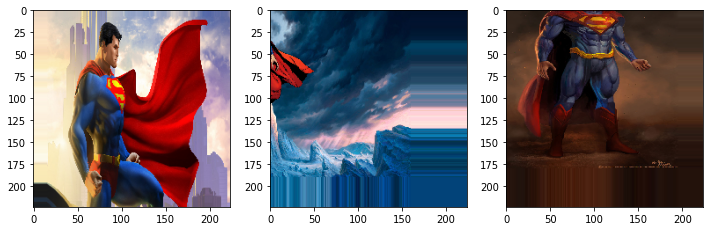

In [ ]:
print_result(out_path+'shift2/*')

### 缩放

In [ ]:
# 0~1是放大，大於一是縮小。所以應該是 原圖/比例 的概念 
# 只是把shift改成縮放，其他地方都和上面一樣，沒什麼值得看的
datagen = image.ImageDataGenerator(zoom_range=0.5)
gen = image.ImageDataGenerator()
data = gen.flow_from_directory(in_path, batch_size=1, class_mode=None, shuffle=True, target_size=(224, 224))
np_data = np.concatenate([data.next() for i in range(data.n)])
datagen.fit(np_data)
gen_data = datagen.flow_from_directory(in_path, batch_size=1, shuffle=False, save_to_dir=out_path+'zoom',save_prefix='gen', target_size=(224, 224))
for i in range(3):
    gen_data.next()

Found 3 images belonging to 1 classes.
Found 3 images belonging to 1 classes.


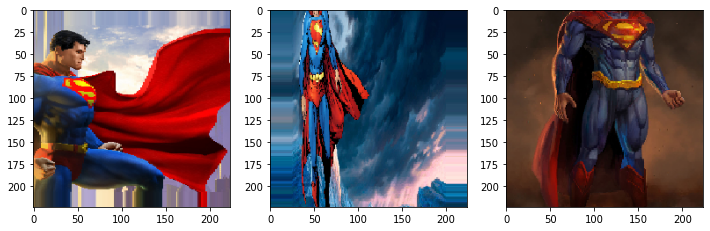

In [ ]:
print_result(out_path+'zoom/*')

### channel_shift

In [ ]:
# 做完channel_shift，人眼看不太出來差異，但實際上像素值就是不一樣，所以對AI來說就是不同圖
# 只是把位移shift改成channel_shift，其他地方都和上面一樣，沒什麼值得看的
datagen = image.ImageDataGenerator(channel_shift_range=15)
gen = image.ImageDataGenerator()
data = gen.flow_from_directory(in_path, batch_size=1, class_mode=None, shuffle=True, target_size=(224, 224))
np_data = np.concatenate([data.next() for i in range(data.n)])
datagen.fit(np_data)
gen_data = datagen.flow_from_directory(in_path, batch_size=1, shuffle=False, save_to_dir=out_path+'channel',save_prefix='gen', target_size=(224, 224))
for i in range(3):
    gen_data.next()

Found 3 images belonging to 1 classes.
Found 3 images belonging to 1 classes.


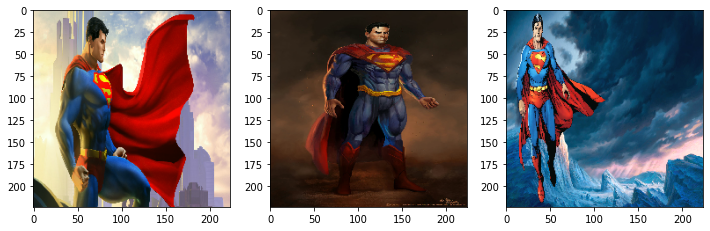

In [ ]:
print_result(out_path+'channel/*')

### 翻转

In [ ]:
# 只是把shift改成flip，其他地方都和上面一樣，沒什麼值得看的
datagen = image.ImageDataGenerator(horizontal_flip=True)
gen = image.ImageDataGenerator()
data = gen.flow_from_directory(in_path, batch_size=1, class_mode=None, shuffle=True, target_size=(224, 224))
np_data = np.concatenate([data.next() for i in range(data.n)])
datagen.fit(np_data)
gen_data = datagen.flow_from_directory(in_path, batch_size=1, shuffle=False, save_to_dir=out_path+'horizontal',save_prefix='gen', target_size=(224, 224))
for i in range(3):
    gen_data.next()

Found 3 images belonging to 1 classes.
Found 3 images belonging to 1 classes.


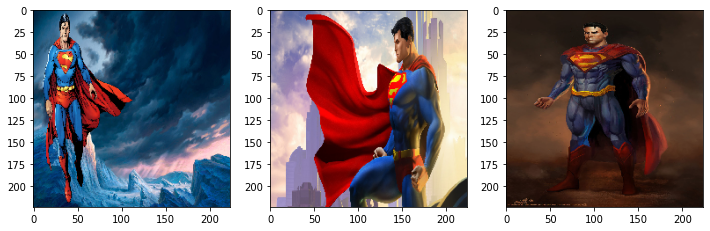

In [ ]:
print_result(out_path+'horizontal/*')

In [ ]:
gen_data = datagen.flow_from_directory(in_path, batch_size=1, shuffle=False, save_to_dir=out_path+'horizontal',save_prefix='gen', target_size=(224, 224))
gen_data.next() # 取得圖像對電腦來說，就是印出一堆數組(就是np.ndarray)

NameError: ignored

### rescale

In [ ]:
# 數值數據預處理：「減均值、除以標準差」
# rescale= 1/255，就是1:255的意思 -> 以0~1的數值，去對應到原本的0~255數值
# 打印8位元圖像，矩陣裡面各像素的數值(各channel的亮度)，原本會是0~255，現在會變成0~1之間了
# 沒見過哪篇論文有寫說不去壓縮到0~1之間，所以rescale的預處理，算是必要的常規方法了
datagen = image.ImageDataGenerator(rescale= 1/255) 
gen = image.ImageDataGenerator()
data = gen.flow_from_directory(in_path, batch_size=1, class_mode=None, shuffle=True, target_size=(224, 224))
np_data = np.concatenate([data.next() for i in range(data.n)])
datagen.fit(np_data)
gen_data = datagen.flow_from_directory(in_path, batch_size=1, shuffle=False, save_to_dir=out_path+'rescale',save_prefix='gen', target_size=(224, 224))
for i in range(3):
    gen_data.next()

Found 3 images belonging to 1 classes.
Found 3 images belonging to 1 classes.


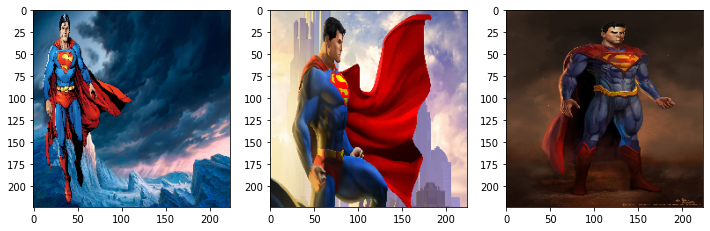

In [ ]:
print_result(out_path+'rescale/*')

In [ ]:
gen_data = datagen.flow_from_directory(in_path, batch_size=1, shuffle=False, save_to_dir=out_path+'rescale',save_prefix='gen', target_size=(224, 224))
gen_data.next()

Found 3 images belonging to 1 classes.


(array([[[[0.        , 0.12156864, 0.23137257],
          [0.        , 0.12941177, 0.23529413],
          [0.        , 0.13725491, 0.2392157 ],
          ...,
          [0.        , 0.1137255 , 0.2392157 ],
          [0.        , 0.1137255 , 0.2392157 ],
          [0.        , 0.1137255 , 0.2392157 ]],
 
         [[0.00784314, 0.12941177, 0.2392157 ],
          [0.        , 0.13333334, 0.2392157 ],
          [0.01176471, 0.15294118, 0.25490198],
          ...,
          [0.00392157, 0.11764707, 0.24313727],
          [0.00392157, 0.11764707, 0.24313727],
          [0.00392157, 0.11764707, 0.24313727]],
 
         [[0.        , 0.13333334, 0.24313727],
          [0.00392157, 0.13725491, 0.24705884],
          [0.00392157, 0.14901961, 0.25490198],
          ...,
          [0.00392157, 0.11764707, 0.24313727],
          [0.00392157, 0.11764707, 0.24313727],
          [0.01176471, 0.11764707, 0.23529413]],
 
         ...,
 
         [[0.02352941, 0.20392159, 0.30588236],
          [0.     

### 填充方法
- 'constant': kkkkkkkk|abcd|kkkkkkkk (cval=k)
- 'nearest': aaaaaaaa|abcd|dddddddd
- 'reflect': abcddcba|abcd|dcbaabcd
- 'wrap': abcdabcd|abcd|abcdabcd



In [ ]:
# fill_mode='wrap' 就是在需要填充的地方，拿自己去到處做填充
datagen = image.ImageDataGenerator(fill_mode='wrap', zoom_range=[4, 4])
gen = image.ImageDataGenerator()
data = gen.flow_from_directory(in_path, batch_size=1, class_mode=None, shuffle=True, target_size=(224, 224))
np_data = np.concatenate([data.next() for i in range(data.n)])
datagen.fit(np_data)
gen_data = datagen.flow_from_directory(in_path, batch_size=1, shuffle=False, save_to_dir=out_path+'fill_mode',save_prefix='gen', target_size=(224, 224))
for i in range(3):
    gen_data.next()

Found 3 images belonging to 1 classes.
Found 3 images belonging to 1 classes.


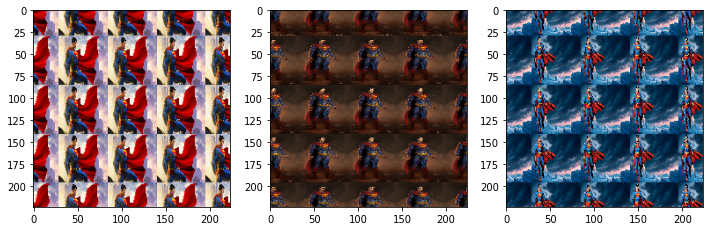

In [ ]:
print_result(out_path+'fill_mode/*')

In [ ]:
datagen = image.ImageDataGenerator(fill_mode='nearest', zoom_range=[4, 4])
gen = image.ImageDataGenerator()
data = gen.flow_from_directory(in_path, batch_size=1, class_mode=None, shuffle=True, target_size=(224, 224))
np_data = np.concatenate([data.next() for i in range(data.n)])
datagen.fit(np_data)
gen_data = datagen.flow_from_directory(in_path, batch_size=1, shuffle=False, save_to_dir=out_path+'nearest',save_prefix='gen', target_size=(224, 224))
for i in range(3):
    gen_data.next()

Found 3 images belonging to 1 classes.
Found 3 images belonging to 1 classes.


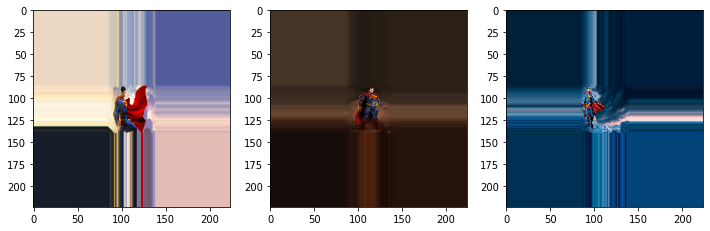

In [ ]:
print_result(out_path+'nearest/*')